In [1]:
import time
from datetime import datetime, timedelta
import pandas as pd

from binance import Client

client = Client()

In [2]:
# global config
symbol = "BTCUSDT"
interval = client.KLINE_INTERVAL_1HOUR
data_lim = 6 * 30 * 24 # 1 hour in 6 months
# start = int(time.time() - data_lim * 3600)

start = int((datetime.today() - timedelta(days=180)).timestamp()*1000)

In [3]:
# dataframe use for saving data

cols = ["openTime", "open", "high", "low", "close",
        "volume", "closeTime", "quoteAssetVolume", "numberOfTrader",
        "takerBuyBaseAssetVolume", "takerBuyQuoteAssetVolume", "ignore"]
df = pd.DataFrame(columns=cols)

In [4]:
klines = client.get_klines(symbol=symbol, interval=interval, startTime=start, limit=500)

In [5]:
# for kline in klines:
#     df.loc[len(df)] = kline

df = pd.read_csv("BTC_USDT.csv")

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

In [7]:
class CFG:
    n_predicts=48 # predict price for next 48 hours

In [8]:
df = df.sort_values(by="closeTime", ascending=True)
df

,id,idCoin,openTime,open,high,low,close,volume,closeTime,quoteAssetVolume,numberOfTrader,takerBuyBaseAssetVolume,takerBuyQuoteAssetVolume,ignore,created_at,updated_at
0,2850994,410,1667894400000,19796.90,19801.39,19663.03,19729.90,18421.65229,1667897999999,3.634725e+08,395167,8974.26163,1.770740e+08,0.0,2023-05-07 14:23:22,2023-05-07 14:23:22
1,2850995,410,1667898000000,19729.90,19794.30,19695.46,19776.33,13578.03427,1667901599999,2.682153e+08,298298,6810.67136,1.345414e+08,0.0,2023-05-07 14:23:22,2023-05-07 14:23:22
2,2850996,410,1667901600000,19775.80,19786.31,19649.14,19690.25,12789.22464,1667905199999,2.523140e+08,295084,6257.13309,1.234495e+08,0.0,2023-05-07 14:23:22,2023-05-07 14:23:22
3,2850997,410,1667905200000,19690.25,19736.83,19580.33,19699.04,16578.59592,1667908799999,3.263770e+08,355567,8276.39964,1.629394e+08,0.0,2023-05-07 14:23:22,2023-05-07 14:23:22
4,2850998,410,1667908800000,19699.04,19746.78,19645.66,19722.32,12839.36089,1667912399999,2.529239e+08,314195,6452.47835,1.271169e+08,0.0,2023-05-07 14:23:22,2023-05-07 14:23:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4619,9265230,410,1684526400000,26834.47,26875.81,26807.73,26831.04,599.06929,1684529999999,1.607944e+07,19378,286.71293,7.694954e+06,0.0,2023-05-20 07:05:09,2023-05-20 07:05:09
4620,9265231,410,1684530000000,26831.03,26906.13,26826.57,26906.12,556.46863,1684533599999,1.495156e+07,19529,305.53001,8.208642e+06,0.0,2023-05-20 07:05:09,2023-05-20 07:05:09
4621,9265232,410,1684533600000,26906.13,26921.21,26862.18,26871.15,454.80868,1684537199999,1.222681e+07,15341,213.64668,5.743318e+06,0.0,2023-05-20 07:05:09,2023-05-20 07:05:09
4622,9265233,410,1684537200000,26871.15,26900.00,26864.03,26880.26,387.83650,1684540799999,1.042543e+07,13722,189.21350,5.086127e+06,0.0,2023-05-20 07:05:09,2023-05-20 07:05:09


In [9]:
df = df[["close", "high", "low", "open", "volume", "quoteAssetVolume", "numberOfTrader", \
                   "takerBuyBaseAssetVolume", "takerBuyQuoteAssetVolume"]]
df

,close,high,low,open,volume,quoteAssetVolume,numberOfTrader,takerBuyBaseAssetVolume,takerBuyQuoteAssetVolume
0,19729.90,19801.39,19663.03,19796.90,18421.65229,3.634725e+08,395167,8974.26163,1.770740e+08
1,19776.33,19794.30,19695.46,19729.90,13578.03427,2.682153e+08,298298,6810.67136,1.345414e+08
2,19690.25,19786.31,19649.14,19775.80,12789.22464,2.523140e+08,295084,6257.13309,1.234495e+08
3,19699.04,19736.83,19580.33,19690.25,16578.59592,3.263770e+08,355567,8276.39964,1.629394e+08
4,19722.32,19746.78,19645.66,19699.04,12839.36089,2.529239e+08,314195,6452.47835,1.271169e+08
...,...,...,...,...,...,...,...,...,...
4619,26831.04,26875.81,26807.73,26834.47,599.06929,1.607944e+07,19378,286.71293,7.694954e+06
4620,26906.12,26906.13,26826.57,26831.03,556.46863,1.495156e+07,19529,305.53001,8.208642e+06
4621,26871.15,26921.21,26862.18,26906.13,454.80868,1.222681e+07,15341,213.64668,5.743318e+06
4622,26880.26,26900.00,26864.03,26871.15,387.83650,1.042543e+07,13722,189.21350,5.086127e+06


In [10]:
df["label"] = df.close.shift(-1)
X_last = df.iloc[-1, :-1].values
df = df.dropna()
df

C:\Users\mirom\AppData\Local\Temp\ipykernel_15104\2842289865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df.close.shift(-1)


,close,high,low,open,volume,quoteAssetVolume,numberOfTrader,takerBuyBaseAssetVolume,takerBuyQuoteAssetVolume,label
0,19729.90,19801.39,19663.03,19796.90,18421.65229,3.634725e+08,395167,8974.26163,1.770740e+08,19776.33
1,19776.33,19794.30,19695.46,19729.90,13578.03427,2.682153e+08,298298,6810.67136,1.345414e+08,19690.25
2,19690.25,19786.31,19649.14,19775.80,12789.22464,2.523140e+08,295084,6257.13309,1.234495e+08,19699.04
3,19699.04,19736.83,19580.33,19690.25,16578.59592,3.263770e+08,355567,8276.39964,1.629394e+08,19722.32
4,19722.32,19746.78,19645.66,19699.04,12839.36089,2.529239e+08,314195,6452.47835,1.271169e+08,19554.76
...,...,...,...,...,...,...,...,...,...,...
4618,26834.46,26890.81,26780.73,26890.80,1018.50532,2.732928e+07,28862,464.08044,1.245213e+07,26831.04
4619,26831.04,26875.81,26807.73,26834.47,599.06929,1.607944e+07,19378,286.71293,7.694954e+06,26906.12
4620,26906.12,26906.13,26826.57,26831.03,556.46863,1.495156e+07,19529,305.53001,8.208642e+06,26871.15
4621,26871.15,26921.21,26862.18,26906.13,454.80868,1.222681e+07,15341,213.64668,5.743318e+06,26880.26


# normalize data

In [11]:
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
X_prepared = scalerX.fit_transform(df.drop(columns="label"))
y_prepared = scalerY.fit_transform(df.label.values.reshape(-1, 1))

# split train test

In [12]:
train_idxs = X_prepared.shape[0] - CFG.n_predicts
X_train, X_test = X_prepared[:train_idxs, :], X_prepared[train_idxs:, :]
y_train, y_test = y_prepared[:train_idxs, :], y_prepared[train_idxs:, :]

X_train.shape, X_test.shape

((4575, 9), (48, 9))

In [13]:
X_train = np.expand_dims(X_train, 1)
X_test = np.expand_dims(X_test, 1)

X_train.shape, X_test.shape

((4575, 1, 9), (48, 1, 9))

# Keras model

In [14]:
units = 64
n_hours = 1
n_time_predicts = 2 * 24
epochs = 50
batch_size = 128
verbose = 0
min_delta = 1e-15
patience = 30
monitor = 'val_loss'

In [15]:
model = Sequential()
model.add(LSTM(units,input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(units))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# model training

In [16]:
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle=False, validation_data=(X_test, y_test),
    callbacks = [EarlyStopping(monitor=monitor, min_delta=min_delta, patience=patience)])

In [17]:
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

2/2 [==============================] - 0s 0s/step


Text(0, 0.5, 'USD ($)')

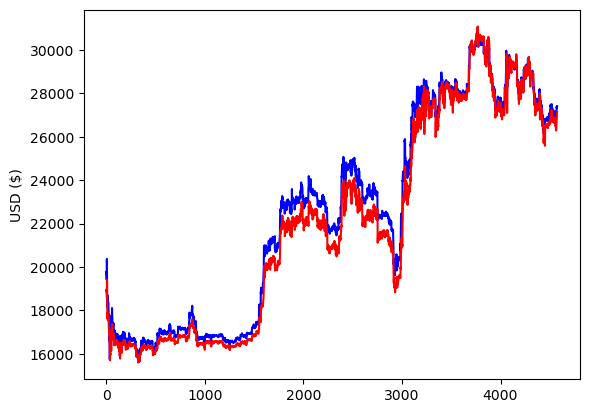

In [18]:
# training fig
y_train_back = scalerY.inverse_transform(y_train)
y_train_hat_back = scalerY.inverse_transform(y_train_hat)

plt.plot(y_train_back, c='b', label="test",)
plt.plot(y_train_hat_back, c='r', label="predict")

plt.ylabel("USD ($)")

Text(0, 0.5, 'USD ($)')

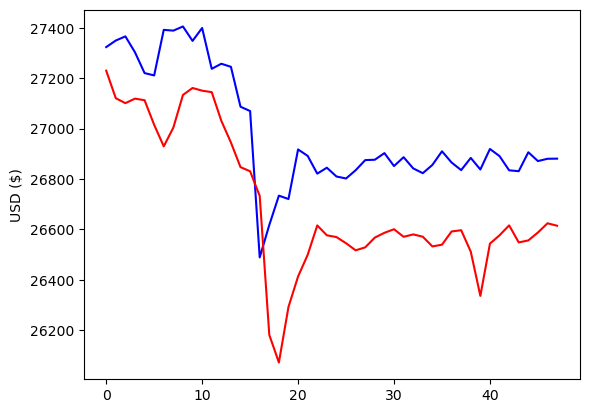

In [19]:
# testing fig
y_test_back = scalerY.inverse_transform(y_test)
y_test_hat_back = scalerY.inverse_transform(y_test_hat)

plt.plot(y_test_back, c='b', label="test",)
plt.plot(y_test_hat_back, c='r', label="predict")

plt.ylabel("USD ($)")

In [20]:
X_test.shape

(48, 1, 9)

In [21]:
X_last_prepared = scalerX.transform(X_last.reshape(1, -1))
X_last_prepared = np.expand_dims(X_last_prepared, 1)

C:\Users\mirom\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [22]:
y_last = model.predict(X_last_prepared)
y_last_back = scalerY.inverse_transform(y_last)


1/1 [==============================] - 0s 16ms/step


In [23]:
y_test_hat_df = pd.DataFrame(y_test_hat_back).reset_index()
y_test_hat_df.index = y_test_hat_df.index.astype("int")
y_test_hat_plot = y_test_hat_df.values.tolist()

y_last_plot = [y_test_hat_plot[-1]]
y_last_plot.append([len(y_test_hat_plot), y_last_back.item()])

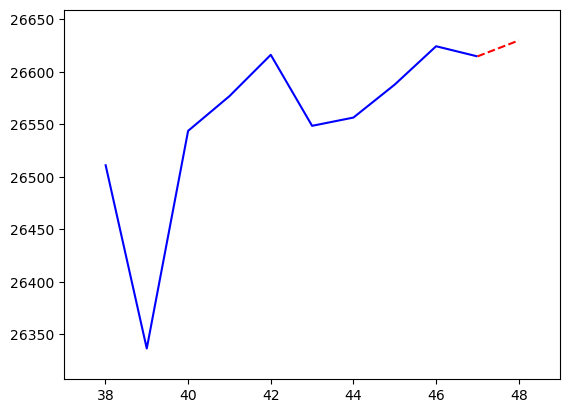

In [24]:
import pylab as pl
from matplotlib import collections  as mc

lines = [y_test_hat_plot[-10:], y_last_plot]

lc = mc.LineCollection(lines, colors=['b', 'r'], linestyle=['-', '--'])
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

# export json

In [25]:
y_last_back.item()

26629.841796875

In [31]:
data = {
    "openPrice": df.close.values[-1],
    "predictPrice": round(y_last_back.item(), 2)
  }

In [34]:
import json
with open('../parimutuel-ts-project/src/components/predict_1hour.json', 'w') as f:
    json.dump(data, f)

In [30]:
round(y_last_back.item(), 2)

26629.84